In [3]:
import matplotlib.pyplot as plt
from helper import *
from math import log,exp
from matplotlib import style
style.use('fivethirtyeight')
import time   
from sklearn.datasets.samples_generator import make_blobs
import numpy as np
from scipy.stats import multivariate_normal
from math import pi
import pickle

X1 = np.loadtxt("LS_Group05/Class1.txt")    
X2 = np.loadtxt("LS_Group05/Class2.txt")
X3 = np.loadtxt("LS_Group05/Class3.txt")
np.random.shuffle(X1)
np.random.shuffle(X2)
np.random.shuffle(X3)

In [38]:
class Perceptron(object):

    def __init__(self, no_of_inputs, threshold=100, learning_rate=0.01):
        self.threshold = threshold
        self.learning_rate = learning_rate
        self.weights = np.zeros(no_of_inputs + 1)
           
    def predict(self, inputs):
        summation = np.dot(inputs, self.weights[1:]) + self.weights[0]
        if(summation > 0):
            return 1
        else:
            return 0
        
    def predict2(self, inputs):
        summation = np.dot(inputs, self.weights[1:]) + self.weights[0]
        return summation
    
    def train(self, training_inputs, labels):
        for _ in range(self.threshold):
            for inputs, label in zip(training_inputs, labels):
                prediction = self.predict(inputs)
                self.weights[1:] += self.learning_rate * (label - prediction) * inputs
                self.weights[0] += self.learning_rate * (label - prediction)

In [39]:
train1 = X1[:int(len(X1)*0.75)]
train2 = X2[:int(len(X2)*0.75)]
train3 = X3[:int(len(X3)*0.75)]
test1 = X1[int(len(X1)*0.75):]
test2 = X2[int(len(X2)*0.75):]
test3 = X3[int(len(X3)*0.75):]
Y1 = np.array([1]*len(train1) + [0]*len(train2) + [0]*len(train3))
Y2 = np.array([0]*len(train1) + [1]*len(train2) + [0]*len(train3))
Y3 = np.array([0]*len(train1) + [0]*len(train2) + [1]*len(train3))
X = np.concatenate([train1,train2])
X = np.concatenate([X,train3])
cla1 = Perceptron(2)
cla2 = Perceptron(2)
cla3 = Perceptron(2)
cla1.train(X,Y1)
cla2.train(X,Y2)
cla3.train(X,Y3)
# print X[0].shape

In [40]:
X=np.linspace(-20,32,400)
Y=np.linspace(-20,12,400)
xi=np.linspace(-20,32,400)
yi=np.linspace(-20,12,400)

XX=[]
YY=[]
for i in range(0, len(X)):
    for j in range(0, len(X)):
        XX.append(X[i])

for i in range(0, len(Y)):
    for j in range(0, len(Y)):
        YY.append(Y[j])

print len(XX),len(YY)
XY=[[XX[i],YY[i]] for i in range(0,len(XX))]
print len(XY)
test_data_name = np.array(XY)
x=[]
y=[]
for i in range(0,4):
    vv=[]
    v=[]
    x.append(v)
    y.append(vv)

def db():
    ans=[]
    for i in range(0,len(test_data_name)):
#         print test_data_name[i]
        p1 = cla1.predict2(test_data_name[i])
        p2 = cla2.predict2(test_data_name[i])
        p3 = cla3.predict2(test_data_name[i])
        argmax = max(p1,p2,p3)
#         print p1,p2,p3
        val = 1
        if(argmax == p1):
            val = 1
        elif(argmax == p2):
            val = 2
        else:
            val = 3
        x[val].append(XY[i][0])
        y[val].append(XY[i][1])
#         print test_data[i][0],test_data[i][1]
#         print X[val],Y[val]
    return ans

res = db()


160000 160000
160000


In [41]:
def db():
    ans=[]
    for i in range(0,len(test_data_name)):
#         print test_data_name[i]
        p1 = cla1.predict(test_data_name[i])
        p2 = cla2.predict(test_data_name[i])
        p3 = cla3.predict(test_data_name[i])
        argmax = max(p1,p2,p3)
        val = 1
        if(argmax == p1):
            val = 1
        elif(argmax == p2):
            val = 2
        else:
            val = 3
        x[val].append(XY[i][0])
        y[val].append(XY[i][1])
#         print test_data[i][0],test_data[i][1]
#         print X[val],Y[val]
    return ans

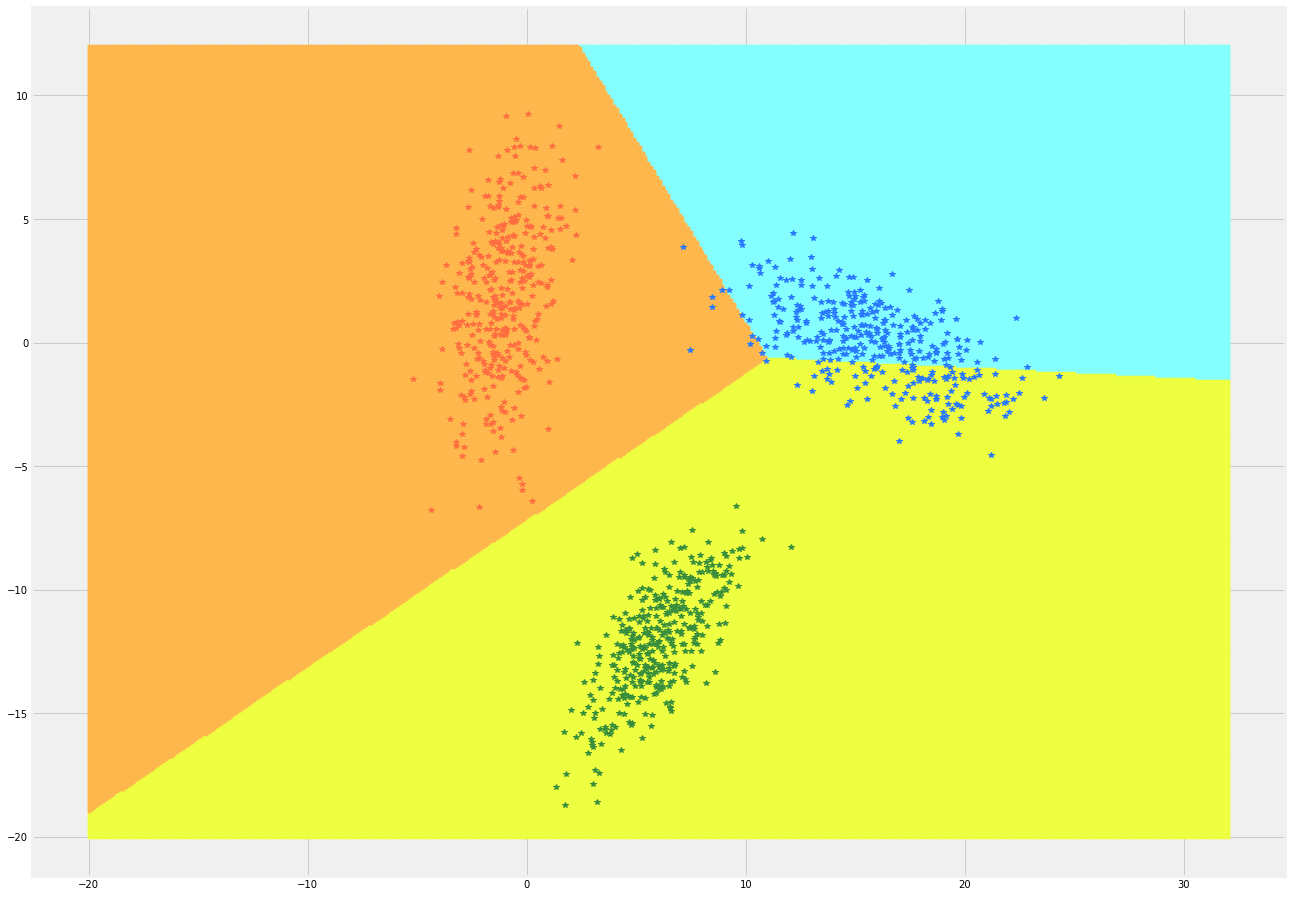

In [42]:
c={}
c[1]='#84FFFF'
c[2]='#EEFF41'
c[3]='#FFB74D'

c2={}
c2[1]='#2979FF'
c2[2]='#388E3C'
c2[3]='#FF6E40'

import matplotlib.mlab as mlab 

plt.rcParams['figure.figsize'] = [20, 16]
plt.plot(x[1],y[1],c[1],marker='.',linestyle='None')
plt.plot(x[2],y[2],c[2],marker='.',linestyle='None')
plt.plot(x[3],y[3],c[3],marker='.',linestyle='None')
X=[train1[i][0] for i in range(0,len(train1)) ]
Y=[train1[i][1] for i in range(0,len(train1)) ]
plt.plot(X,Y,c=c2[1],marker='*',linestyle='None')
X=[train2[i][0] for i in range(0,len(train2)) ]
Y=[train2[i][1] for i in range(0,len(train2)) ]
plt.plot(X,Y,c=c2[2],marker='*',linestyle='None')
X=[train3[i][0] for i in range(0,len(train3)) ]
Y=[train3[i][1] for i in range(0,len(train3)) ]
plt.plot(X,Y,c=c2[3],marker='*',linestyle='None')
plt.show()

In [44]:
testX = np.concatenate([test1,test2])
testX = np.concatenate([testX,test3])
Y = np.array([0]*len(test1) + [1]*len(test2) + [2]*len(test3))


In [45]:
m = np.zeros((3,3))
for i in range(0,len(testX)):
    p1 = cla1.predict2(testX[i])
    p2 = cla2.predict2(testX[i])
    p3 = cla3.predict2(testX[i])
    argmax = max(p1,p2,p3)
#         print p1,p2,p3
    val = 1
    if(argmax == p1):
        val = 0
    elif(argmax == p2):
        val = 1
    else:
        val = 2
    m[Y[i]][val] += 1
    

In [47]:
accuracy=(sum([m[i][i] for i in range(0,3)]))/(float)(sum([sum(m[i]) for i in range(0,3)]))
precision=[m[i][i]/(float)(m[0][i]+m[1][i]+m[2][i]) for i in range(0,3)]
recall=[m[i][i]/(float)(m[i][0]+m[i][1]+m[i][2]) for i in range(0,3)]
f_measure=[(2*precision[i]*recall[i])/(precision[i]+recall[i]) for i in range(0,3)]
mean_precision=sum([precision[i] for i in range(0,3)])/3.0
mean_recall=sum([recall[i] for i in range(0,3)])/3.0
mean_f_measure=sum([f_measure[i] for i in range(0,3)])/3.0

In [48]:
print "Confusion Matrix : {0}".format(m)
print "Accuracy :",accuracy
print "Precision :{0}".format(precision),"Mean Precision :",mean_precision
print "Recall :{0}".format(recall),"Mean Recall :",mean_recall
print "F-measure :{0}".format(f_measure),"Mean F-measure :",mean_f_measure

Confusion Matrix : [[ 94.  28.   3.]
 [  0. 125.   0.]
 [  0.   0. 125.]]
Accuracy : 0.9173333333333333
Precision :[1.0, 0.8169934640522876, 0.9765625] Mean Precision : 0.9311853213507625
Recall :[0.752, 1.0, 1.0] Mean Recall : 0.9173333333333332
F-measure :[0.8584474885844748, 0.8992805755395683, 0.9881422924901185] Mean F-measure : 0.9152901188713872
